In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("COVID.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Columns: 150532 entries, Unnamed: 0 to labels
dtypes: int64(150530), object(2)
memory usage: 346.8+ MB


In [4]:
data.shape

(302, 150532)

In [5]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [6]:
data = data.set_index(['Unnamed: 0.1.1'])

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
y[-1]

'normal'

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
X  = sc.fit_transform(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


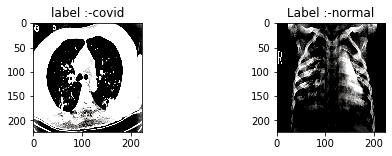

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
ax1.imshow(X[1].reshape(224, 224, 3).astype(float))
ax2.imshow(X[-1].reshape(224, 224, 3).astype(float))
ax1.title.set_text("label :-"+y[1])
ax2.title.set_text("Label :-"+y[-1])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=54)

In [14]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((243, 150528), (31, 150528), (28, 150528), (243,), (31,), (28,))

In [15]:
X_train = X_train.reshape(len(X_train), 224, 224, 3).astype(float)
X_test = X_test.reshape(len(X_test), 224, 224, 3).astype(float)
X_val = X_val.reshape(len(X_val), 224, 224, 3).astype(float)

In [16]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
lb = LabelEncoder()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)

In [18]:
y_train = to_categorical(y_train).astype(float)
y_test = to_categorical(y_test).astype(float)
y_val = to_categorical(y_val).astype(float)

In [19]:
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam

In [23]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [24]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(5, 5), strides=(1,1), padding="valid", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPool2D((4, 4)))
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1,1), padding="valid", activation="relu"))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(2, 2), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), strides=(1,1), padding="valid",activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(2, activation="softmax"))

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: all CUDA-capable devices are busy or unavailable

In [ ]:
model.summary()

In [0]:
from keras.preprocessing import image

train = image.ImageDataGenerator(rescale=1/255,
                                fill_mode="nearest")

In [0]:
batch_size = 8
epochs = 30

In [0]:
optimizer = Adam(lr = 0.001, decay=0.001/epochs)

In [25]:
model.compile(loss="binary_crossentropy", 
             optimizer=optimizer, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
history = model.fit(train.flow(X_train, y_train, batch_size=batch_size), epochs =epochs,steps_per_epoch=len(X_train)//batch_size,
                   validation_data=train.flow(X_val, y_val), validation_steps=len(X_val)//batch_size)

Epoch 1/30
30/30 [==============================] - 0s 14ms/step - loss: 0.1321 - acc: 0.9375 - val_loss: 0.4392 - val_acc: 0.8214
Epoch 2/30
30/30 [==============================] - 0s 14ms/step - loss: 0.1478 - acc: 0.9541 - val_loss: 0.1676 - val_acc: 0.8929
Epoch 3/30
30/30 [==============================] - 1s 17ms/step - loss: 0.0631 - acc: 0.9875 - val_loss: 0.0908 - val_acc: 0.9643
Epoch 4/30
30/30 [==============================] - 1s 17ms/step - loss: 0.0573 - acc: 0.9792 - val_loss: 0.1312 - val_acc: 0.9286
Epoch 5/30
30/30 [==============================] - 0s 17ms/step - loss: 0.0693 - acc: 0.9792 - val_loss: 0.0991 - val_acc: 0.9643
Epoch 6/30
30/30 [==============================] - 1s 17ms/step - loss: 0.0733 - acc: 0.9792 - val_loss: 0.0766 - val_acc: 0.9643
Epoch 7/30
30/30 [==============================] - 0s 17ms/step - loss: 0.0767 - acc: 0.9750 - val_loss: 0.1060 - val_acc: 0.9286
Epoch 8/30
30/30 [==============================] - 1s 17ms/step - loss: 0.0146 - a

In [29]:
model.evaluate(x=X_test, y=y_test)

31/31 [==============================] - 0s 2ms/step


[0.5171045660972595, 0.9677419066429138]

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = np.argmax(y_pred, axis=1)

In [0]:
y_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_pred, y_test)

In [52]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[14  0]
 [ 1 16]]
acc: 0.9677
sensitivity: 1.0000
specificity: 0.9412


In [72]:
y_pred_cat = []
y_test_cat = []

def cat(array, predit):
    for i in range(len(array)):
        if array[i] == 0:
            predit.append("covid")
        else:
            predit.append("normal")
cat(y_pred, y_pred_cat)
cat(y_test, y_test_cat)

print(y_pred_cat)

['covid', 'normal', 'covid', 'normal', 'normal', 'normal', 'normal', 'covid', 'normal', 'covid', 'covid', 'normal', 'normal', 'covid', 'covid', 'covid', 'covid', 'normal', 'normal', 'normal', 'covid', 'covid', 'normal', 'normal', 'normal', 'covid', 'normal', 'covid', 'normal', 'covid', 'normal']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


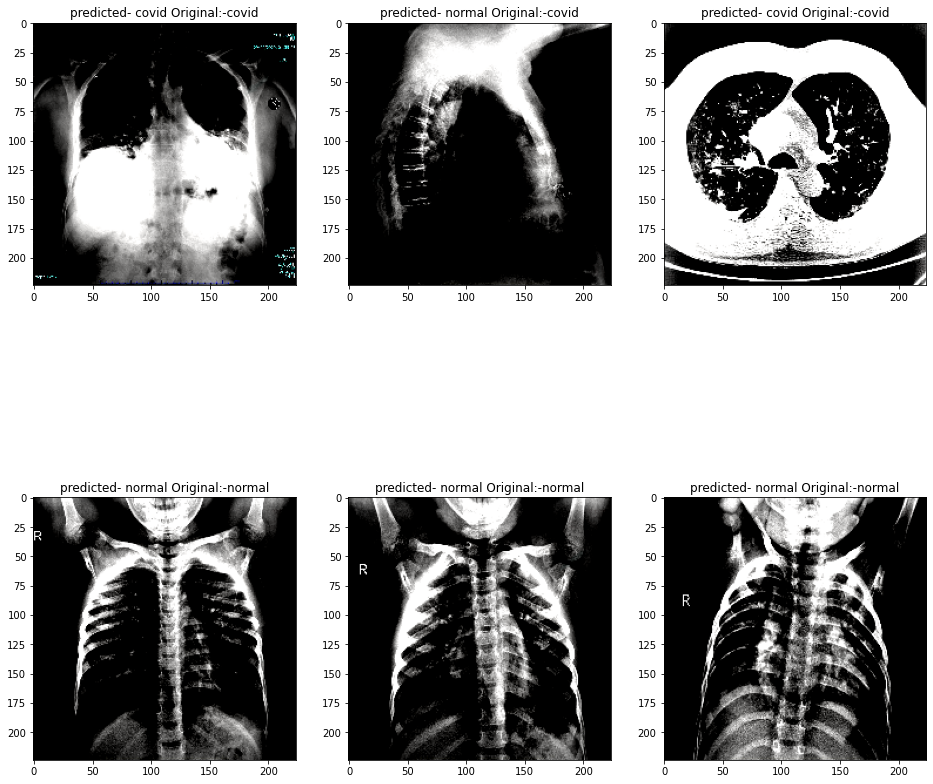

In [124]:
fig, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(2,3, figsize=(16, 16))

ax1.imshow(X_test[0])
ax1.title.set_text("predicted- "+y_pred_cat[0]+" Original:-"+y_test_cat[0])
ax2.imshow(X_test[1])
ax2.title.set_text("predicted- "+y_pred_cat[1]+" Original:-"+y_test_cat[1])
ax3.imshow(X_test[2])
ax3.title.set_text("predicted- "+y_pred_cat[2]+" Original:-"+y_test_cat[2])
ax4.imshow(X_test[3])
ax4.title.set_text("predicted- "+y_pred_cat[3]+" Original:-"+y_test_cat[3])
ax5.imshow(X_test[4])
ax5.title.set_text("predicted- "+y_pred_cat[4]+" Original:-"+y_test_cat[4])
ax6.imshow(X_test[5])
ax6.title.set_text("predicted- "+y_pred_cat[5]+" Original:-"+y_test_cat[5])

In [0]:
fig.savefig("predicted.png")